In [1]:
#insert module
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os

In [2]:
#path of the csv
city_path = os.path.join("Resources", "city_data.csv")
ride_path = os.path.join("Resources", "ride_data.csv")

In [3]:
#Read the csv
city_pd = pd.read_csv(city_path)
city_pd.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
ride_pd = pd.read_csv(ride_path)
ride_pd.head()

,city,date,fare,ride_id
0,Sarabury,1/16/16 13:49,38.35,5.403690e+12
1,South Roy,1/2/16 18:42,17.49,4.036270e+12
2,Wiseborough,1/21/16 17:35,44.18,3.645040e+12
3,Spencertown,7/31/16 14:53,6.87,2.242600e+12
4,Nguyenbury,7/9/16 4:42,6.28,1.543060e+12


In [5]:
#merge the two dataframes
merged = pd.merge(city_pd, ride_pd, on='city', how='outer')
merged.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,8/19/16 4:27,5.51,6.246010e+12
1,Kelseyland,63,Urban,4/17/16 6:59,5.54,7.466470e+12
2,Kelseyland,63,Urban,5/4/16 15:06,30.54,2.140500e+12
3,Kelseyland,63,Urban,1/25/16 20:44,12.08,1.896990e+12
4,Kelseyland,63,Urban,8/9/16 18:19,17.91,8.784210e+12


In [6]:
#Find the Average Fare per city and drivers per city
merged_sort = merged.sort_values('city', ascending=True)
Sum_city_fares = merged_sort.groupby('city')['fare'].sum()
Drivers_per_city = merged_sort.groupby('city')['driver_count'].count()
Avg_city_fare = (Sum_city_fares/Drivers_per_city)
Avg_city_fare.head().round(2)

city
Alvarezhaven    23.93
Alyssaberg      20.61
Anitamouth      37.32
Antoniomouth    23.63
Aprilchester    21.98
dtype: float64

In [7]:
#Find the number of rides per city
Rides_per_city = merged_sort.groupby('city')['date'].count()
Rides_per_city.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: date, dtype: int64

In [8]:
#Find the type of city
Type_of_city = merged_sort.groupby('type')['city'].value_counts()
Urban = merged_sort.loc[merged_sort['type'] == "Urban",:]
Suburban = merged_sort.loc[merged_sort['type'] == "Suburban",:]
Rural = merged_sort.loc[merged_sort['type']== "Rural",:]
Type_of_city.head()

type   city         
Rural  South Joseph     12
       East Leslie      11
       East Stephen     10
       Kennethburgh     10
       North Whitney    10
Name: city, dtype: int64

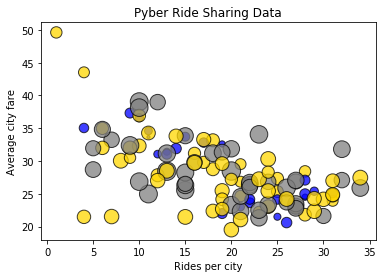

In [9]:
#Store driver count as a numpy array
driver_count = np.array(Type_of_city)

#Enlarge the driver count
driver_count = driver_count * 10

#Designate the colors for the types of cities
colors = {"Gold", "Blue", "Gray"}

#Scatter plot of Pyber Ride Sharing Data
plt.scatter(Rides_per_city, Avg_city_fare, s = driver_count , c = Type_of_city, cmap=matplotlib.colors.ListedColormap(colors), alpha = 0.75, edgecolors = 'black', linewidths = 1)

#labels
xlab = 'Rides per city'
ylab = 'Average city fare'
title = 'Pyber Ride Sharing Data'

#Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

#Add title
plt.title(title)

#graph the plot
plt.show()

In [20]:
# create pie chart of % of total city fares by city type
City_fare_type = merged_sort.groupby('type')['fare'].sum()
City_fare_sum = merged_sort['fare'].sum()
labels = ["Urban", "Suburban", "Rural"]
slice_percent = [63.97,30.35,6.68]
colors = ["Gold","Gray","Blue"]
explode = (0.1,0,0)

plt.pie(slice_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=175)

([<matplotlib.patches.Wedge at 0x111b35438>,
 [Text(0.390799,-1.13458,'Urban'),
  Text(-0.135981,1.09156,'Suburban'),
  Text(-1.05247,0.319863,'Rural')],
 [Text(0.227966,-0.661839,'63.3%'),
  Text(-0.0741712,0.595398,'30.0%'),
  Text(-0.574073,0.174471,'6.6%')])

In [21]:
#make sure the axis are equal
plt.axis('equal')

(-1.0981641774296413,
 1.1451641884817496,
 -1.2143523554572748,
 1.1178802155480043)

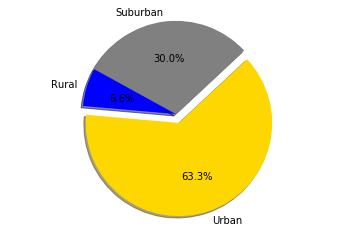

In [22]:
#plot the pie chart
plt.show()

In [23]:
# create pie chart of % of total rides by city type
City_ride_type = merged_sort.groupby('type')['date'].count()
City_ride_sum = len(merged_sort)
labels = ["Urban", "Suburban", "Rural"]
slice_percent = [68.42,26.32,5.26]
colors = ["Gold","Gray","Blue"]
explode = (0.1,0,0)

plt.pie(slice_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=175)

([<matplotlib.patches.Wedge at 0x111bd74e0>,
 [Text(0.566249,-1.058,'Urban'),
  Text(-0.352456,1.04201,'Suburban'),
  Text(-1.06512,0.274823,'Rural')],
 [Text(0.330312,-0.617166,'68.4%'),
  Text(-0.192249,0.568366,'26.3%'),
  Text(-0.580972,0.149904,'5.3%')])

In [24]:
#make the axes equal
plt.axis('equal')

(-1.0984050787698971,
 1.1502235654332686,
 -1.2005705419520711,
 1.1134301990216364)

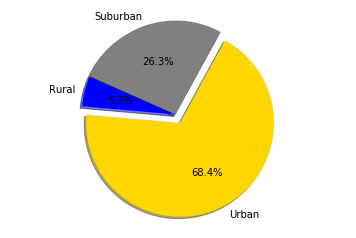

In [25]:
#plot the pie chart
plt.show()

In [26]:
# create pie chart of % of total drivers by city type
City_driver_type = merged_sort.groupby('type')['driver_count'].sum()
City_driver_sum = merged_sort['driver_count'].sum()
labels = ["Urban", "Suburban", "Rural"]
slice_percent = [86.16,12.87,.97]
colors = ["Gold","Gray","Blue"]
explode = (0.1,0,0)

plt.pie(slice_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=175)

([<matplotlib.patches.Wedge at 0x111c75ba8>,
 [Text(1.04015,-0.598403,'Urban'),
  Text(-0.936316,0.577333,'Suburban'),
  Text(-1.09238,0.129215,'Rural')],
 [Text(0.606755,-0.349069,'86.2%'),
  Text(-0.510718,0.314909,'12.9%'),
  Text(-0.595846,0.070481,'1.0%')])

In [27]:
#equal axis
plt.axis('equal')

(-1.1006123715895457,
 1.1965768156274426,
 -1.153525148565463,
 1.0556729605936248)

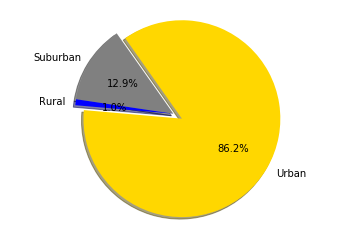

In [28]:
#plot the chart
plt.show()